## Linear Regression

In this case the Linear Regression is on one dimension input to one dimension output (linear).

The following practices solve issues regarding to errors in messy data. First, we analyze the data as always checking connections in between the variables, infering insights about the data before modelling. That is crucial to perform a correct modelling. Then, we predict based on the inputs the most favorable outcome for minimizing the parameter $\beta$ using the classical least square method  for quantitative responses i.e.

$$
min_{\beta} ||y-\bar{y}||
$$



### Data cleaning

In [2]:
from sklearn.datasets import fetch_california_housing

cali_housing = fetch_california_housing()
X , Y, ch_name_columns = cali_housing.data , cali_housing.target, cali_housing.feature_names + cali_housing.target_names


In [16]:
import pandas as pd
import numpy as np


ch_columns = np.hstack((X,Y.reshape(-1,1)))
ch_df = pd.DataFrame(data= ch_columns, columns=ch_name_columns)
ch_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
ch_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
corr = ch_df.corr()
corr.style.background_gradient(cmap='Blues')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


## Linear regression

In [1]:
# expliting the data between training (70%) and testing (30%)
import numpy as np

if X.shape[0] == Y.shape[0]:
    length = X.shape[0]
else:
    print('Inputs and output variables have different length')


np.random.seed(96) 
X_copy, Y_copy = X.copy(), Y.copy()

np.random.shuffle(X_copy)
np.random.shuffle(Y_copy)

X_train, y_train =  X_copy[:int(length * .7)] , Y_copy[:int(length * .7)]
X_test, y_test = X_copy[int(length * .7):] , Y_copy[int(length * .7):]

NameError: name 'X' is not defined

In [73]:
# expliting the data between training (70%) and testing (30%) using sklearn

from sklearn.model_selection import train_test_split


if X.shape[0] == Y.shape[0]:
    length = X.shape[0]
else:
    print('Inputs and output variables have different length')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=96) 

In [49]:
X_train[:,1].shape

(14448,)

In [55]:
from sklearn import linear_model

# considering houseage
house_age_train , house_age_test = X_train[:,1].reshape(-1,1) , X_test[:,1].reshape(-1,1)
y_train , y_test = y_train.reshape(-1,1) , y_test.reshape(-1,1)



lm = linear_model.LinearRegression()
lm.fit(house_age_train , y_train)
y_predict = lm.predict(house_age_test)

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

lm_error = mean_squared_error(y_test, y_predict)
# The coefficient of determination: 1 is perfect prediction
lm_r2 = r2_score(y_test, y_predict)

print(f'The RSS and R2 are {lm_error} and {lm_r2} respectively')

# We conclude from the model that with a R2 equivalent to -0.0001 might be due to overfitting, so both coefficients and bias might be incorrect.



The RSS and R2 are 1.3626674875914597 and -0.0007008364132279343 respectively


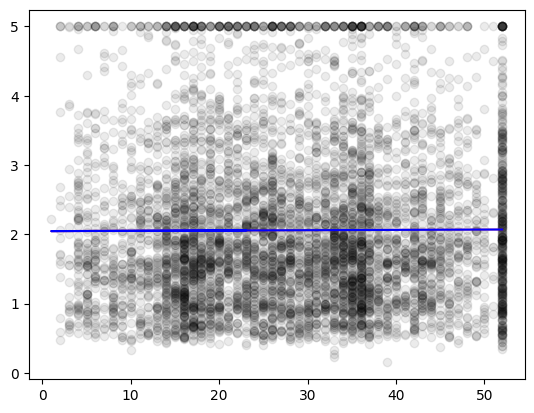

In [69]:
import matplotlib.pyplot as plt

plt.scatter(house_age_test, y_test, color='black',alpha=0.08)
plt.plot(house_age_test, y_predict, color='red', alpha=0.5)
plt.plot(house_age_test, house_age_test * lm.coef_[0] + lm.intercept_, color='blue')


In [64]:
lm.coef_

array([[0.00045585]])

In [9]:
import pandas as pd

df = pd.DataFrame(data=np.array([0,1,None,4]))

df.fillna(0)

/tmp/ipykernel_59268/2234955171.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(0)


,0
0,0
1,1
2,0
3,4


In [14]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X,Y)
print(lm.coef_, lm.intercept_, lm.score(X,Y))

[ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01] -36.94192020718441 0.606232685199805


In [10]:
lm.intercept_

-36.94192020718441

In [11]:
a = ch_target.reshape(-1,1)
np.hstack((ch_data,a))

# np.array([ch_data,ch_target])

NameError: name 'ch_target' is not defined